<a href="https://colab.research.google.com/github/Jiaanst/Regression_Analysis-readme.md/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


In [1]:
import pandas as pd
import numpy as np

# Import Data Set

In [2]:
data = pd.read_csv('/co2_polution.csv')

In [5]:
data.head()

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,PICKUP TRUCK - STANDARD,5.3,8,Regular gasoline,14.6,10.3,12.7,22.0,298.0
1,MID-SIZE,2.4,4,Regular gasoline,9.1,6.8,8.0,35.0,187.0
2,PICKUP TRUCK - SMALL,3.6,6,Regular gasoline,13.0,9.2,11.3,25.0,265.0
3,MID-SIZE,2.0,4,Premium gasoline,10.5,7.6,9.2,31.0,215.0
4,MID-SIZE,2.0,4,Diesel,7.8,5.3,6.7,42.0,182.0


In [4]:
# cek dimensi data set
data.columns

Index(['vehicle_class', 'engine_size', 'cylinders', 'fuel_type',
       'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb',
       'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [6]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vehicle_class       4938 non-null   object 
 1   engine_size         4925 non-null   float64
 2   cylinders           4938 non-null   int64  
 3   fuel_type           4938 non-null   object 
 4   fuel_cons_city      4934 non-null   float64
 5   fuel_cons_hwy       4919 non-null   float64
 6   fuel_cons_comb      4938 non-null   float64
 7   fuel_cons_comb_mpg  4938 non-null   float64
 8   co2                 4938 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 347.3+ KB


In [7]:
#menampilkan jumlah nilai unik pada setiap kolom
data.nunique()

,0
vehicle_class,16
engine_size,148
cylinders,16
fuel_type,4
fuel_cons_city,308
fuel_cons_hwy,240
fuel_cons_comb,278
fuel_cons_comb_mpg,151
co2,428


In [8]:
#cek data kosong
data.isna().sum()

,0
vehicle_class,0
engine_size,13
cylinders,0
fuel_type,0
fuel_cons_city,4
fuel_cons_hwy,19
fuel_cons_comb,0
fuel_cons_comb_mpg,0
co2,0


In [9]:
data[data['fuel_cons_city'].isna()]

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
625,STATION WAGON - SMALL,1.5,4,Regular gasoline,NaN,6.9,7.7,37.0,177.0
641,SUV - SMALL,3.7,6,Premium gasoline,NaN,10.7,12.8,22.0,294.0
1180,FULL-SIZE,2.0,4,Regular gasoline,NaN,4.6,5.0,56.0,117.0
3935,SUV - STANDARD,5.6,8,Regular gasoline,NaN,13.4,16.6,17.0,382.0


In [12]:
#mencari mean dari setiap data kosong
data_copy = data.copy(deep=True)
mean_engine = data_copy['engine_size'].mean()
mean_city = data_copy['fuel_cons_city'].mean()
mean_hwy = data_copy['fuel_cons_hwy'].mean()

In [14]:
print(f"Mean of Engine Size : {mean_engine}")
print(f"Mean of Fuel City : {mean_city}")
print(f"Mean of Fuel Hwy : {mean_hwy}")

Mean of Engine Size : 3.11053248813621
Mean of Fuel City : 12.504822265022955
Mean of Fuel Hwy : 9.008906364771683


In [15]:
#mengisi data kosong dengan mean setiap kolom yang memiliki data kosong
data_copy.fillna({
    'engine_size': mean_engine,
    'fuel_cons_city': mean_city,
    'fuel_cons_hwy': mean_hwy
}, inplace=True)

In [16]:
data_copy[data['fuel_cons_city'].isna()]

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
625,STATION WAGON - SMALL,1.5,4,Regular gasoline,12.504822,6.9,7.7,37.0,177.0
641,SUV - SMALL,3.7,6,Premium gasoline,12.504822,10.7,12.8,22.0,294.0
1180,FULL-SIZE,2.0,4,Regular gasoline,12.504822,4.6,5.0,56.0,117.0
3935,SUV - STANDARD,5.6,8,Regular gasoline,12.504822,13.4,16.6,17.0,382.0


In [17]:
data_copy.isna().sum()

,0
vehicle_class,0
engine_size,0
cylinders,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0
fuel_cons_comb_mpg,0
co2,0


In [18]:
#mengisi data kosong dengan algoritma K-Nearest Neighbors
from sklearn.impute import KNNImputer

null_columns = ['engine_size', 'fuel_cons_city', 'fuel_cons_hwy']

imputer = KNNImputer(n_neighbors=5)
data[null_columns] = imputer.fit_transform(data_copy[null_columns])

In [19]:
data.isna().sum()

,0
vehicle_class,0
engine_size,0
cylinders,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0
fuel_cons_comb_mpg,0
co2,0


In [20]:
data[data.duplicated()]

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
2444,MINICOMPACT,3.8,6,Premium gasoline,13.0,9.2,11.3,25.0,260.0
4213,MINICOMPACT,3.8,6,Premium gasoline,13.0,9.2,11.3,25.0,260.0
4790,MINICOMPACT,3.8,6,Premium gasoline,13.0,9.2,11.3,25.0,260.0


In [21]:
#membuang data yang terduplikat
data.drop_duplicates(inplace=True)

In [22]:
data[data.duplicated()]

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2


In [23]:
#mengecek kolom dengan tipe data numerik
data_numerik = data.select_dtypes(include=['int64', 'float64'])
data_numerik.columns

Index(['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

In [25]:
data_karakter = data.select_dtypes(include=['object'])
data_karakter.columns

Index(['vehicle_class', 'fuel_type'], dtype='object')

In [26]:
data.head()

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,PICKUP TRUCK - STANDARD,5.3,8,Regular gasoline,14.6,10.3,12.7,22.0,298.0
1,MID-SIZE,2.4,4,Regular gasoline,9.1,6.8,8.0,35.0,187.0
2,PICKUP TRUCK - SMALL,3.6,6,Regular gasoline,13.0,9.2,11.3,25.0,265.0
3,MID-SIZE,2.0,4,Premium gasoline,10.5,7.6,9.2,31.0,215.0
4,MID-SIZE,2.0,4,Diesel,7.8,5.3,6.7,42.0,182.0


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['vehicle_class'] = encoder.fit_transform(data['vehicle_class'])
data['fuel_type'] = encoder.fit_transform(data['fuel_type'])

In [28]:
data.head()

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,6,5.3,8,3,14.6,10.3,12.7,22.0,298.0
1,2,2.4,4,3,9.1,6.8,8.0,35.0,187.0
2,5,3.6,6,3,13.0,9.2,11.3,25.0,265.0
3,2,2.0,4,2,10.5,7.6,9.2,31.0,215.0
4,2,2.0,4,0,7.8,5.3,6.7,42.0,182.0


In [29]:
#melihat statistika deskriptif tiap kolom
data.describe()

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
count,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000
mean,6.174063,3.110113,5.597366,2.385005,12.504521,9.008790,10.899542,28.077978,248.540629
std,4.788250,1.381358,2.005008,0.713596,3.734065,2.391487,3.032083,7.810282,61.099771
min,0.000000,-0.033955,2.000000,0.000000,3.400683,3.140139,3.165062,10.031223,96.000000
25%,2.000000,2.000000,4.000000,2.000000,9.900000,7.400000,8.800000,23.000000,204.000000
50%,6.000000,3.000000,6.000000,2.000000,11.900000,8.600000,10.400000,27.000000,242.000000
75%,11.000000,3.600000,6.000000,3.000000,14.400000,10.100000,12.500000,32.000000,285.000000
max,15.000000,9.373928,17.000000,3.000000,31.481611,21.339620,27.002350,69.175420,522.000000


In [30]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

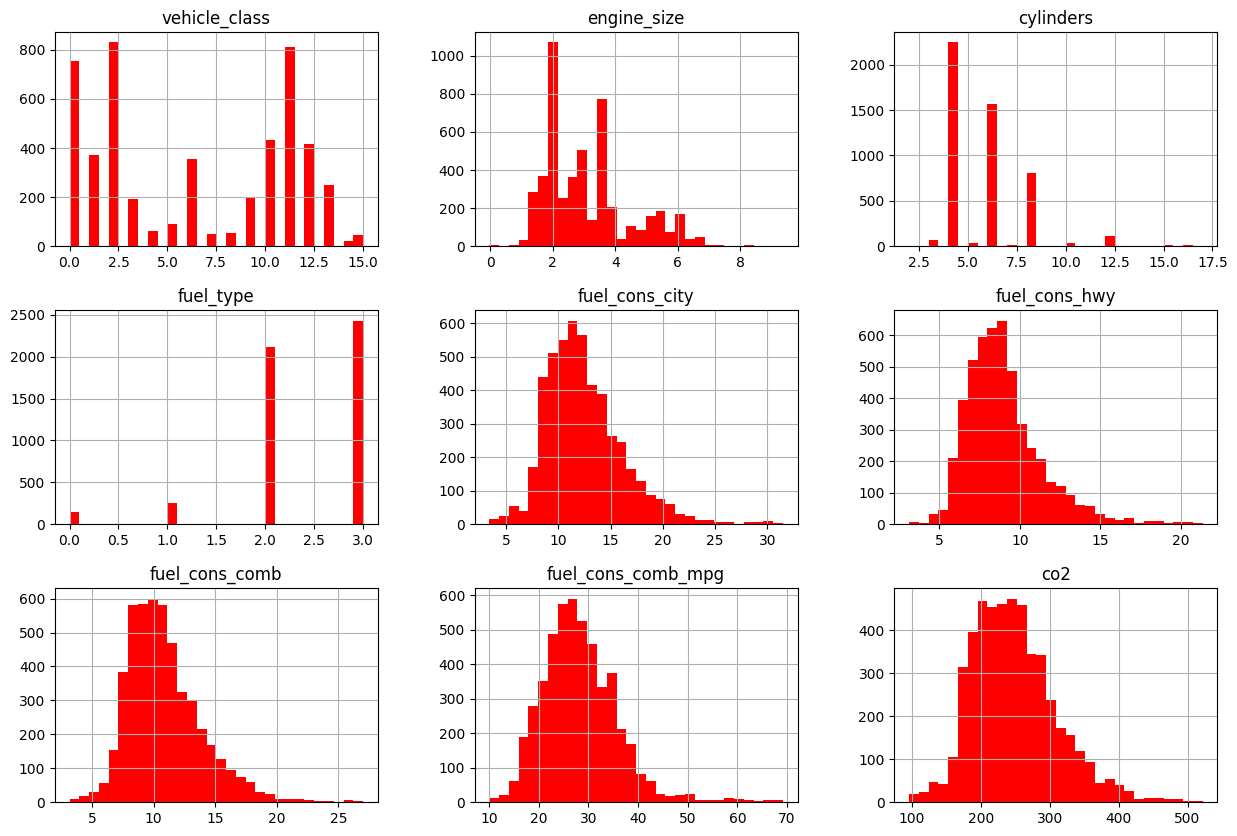

In [34]:
#visualisasi menggunakan histogram untuk melihat di
data.hist(figsize=(15,10), bins=30, color='red')
plt.show()

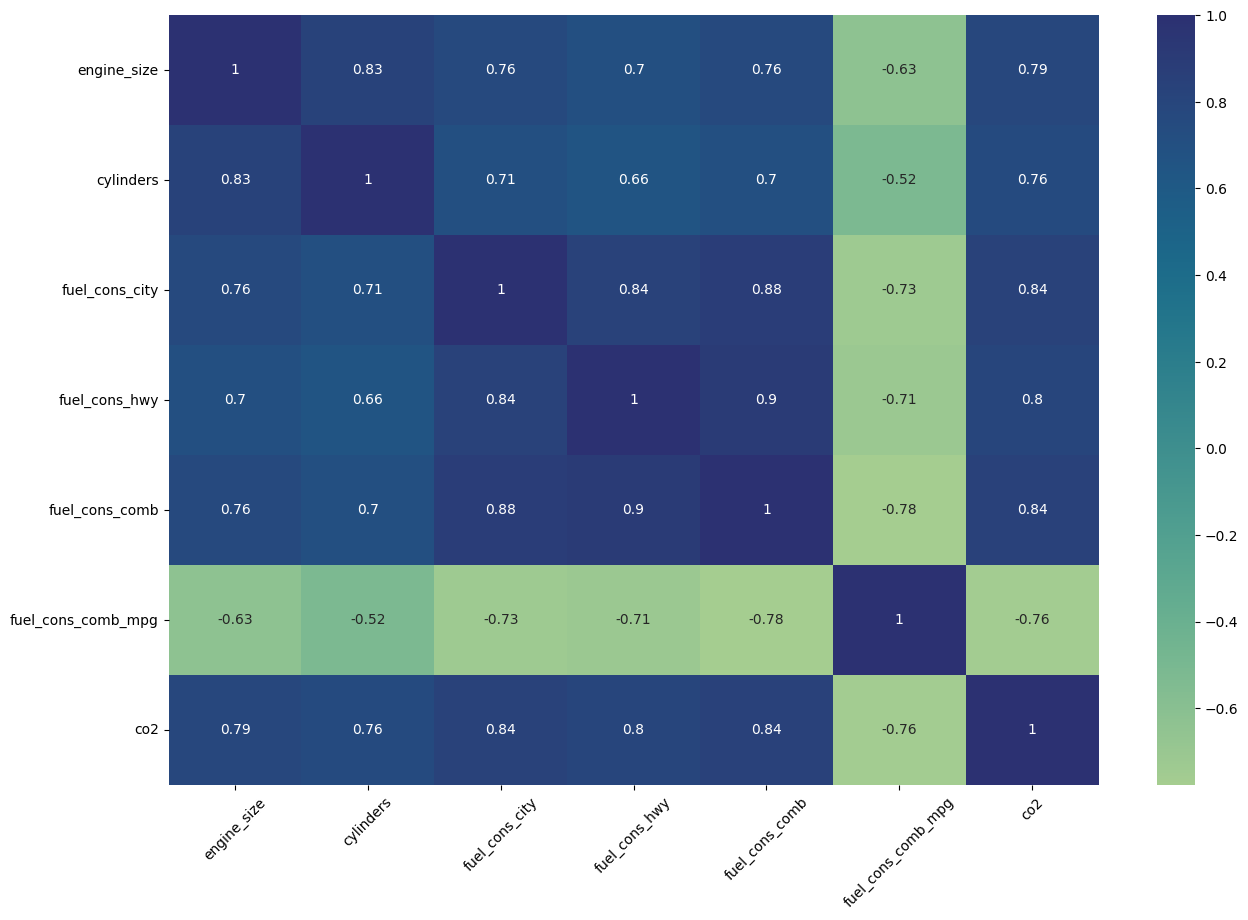

In [35]:
#visualisasi menggunakan heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data_numerik.corr(), annot=True, cmap='crest')
plt.xticks(rotation=45)
plt.show()

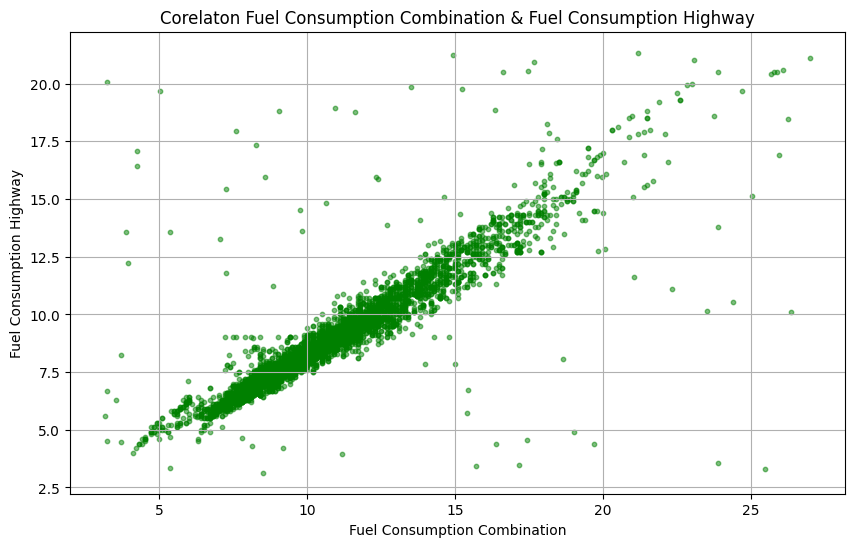

In [36]:
# visualisasi korelasi positif menggunakan scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x=data['fuel_cons_comb'], y=data['fuel_cons_hwy'], color='green', alpha=0.5, s=10)
plt.title('Corelaton Fuel Consumption Combination & Fuel Consumption Highway')
plt.xlabel('Fuel Consumption Combination')
plt.ylabel('Fuel Consumption Highway')
plt.grid(True)
plt.show()

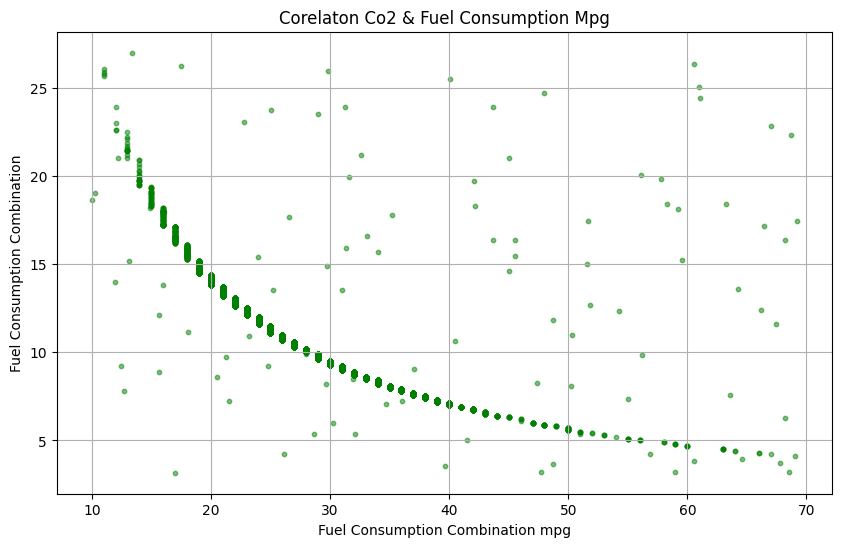

In [37]:
# visualisasi korelasi negatif menggunakan scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x=data['fuel_cons_comb_mpg'], y=data['fuel_cons_comb'], color='green', alpha=0.5, s=10)
plt.title('Corelaton Co2 & Fuel Consumption Mpg')
plt.xlabel('Fuel Consumption Combination mpg')
plt.ylabel('Fuel Consumption Combination')
plt.grid(True)
plt.show()

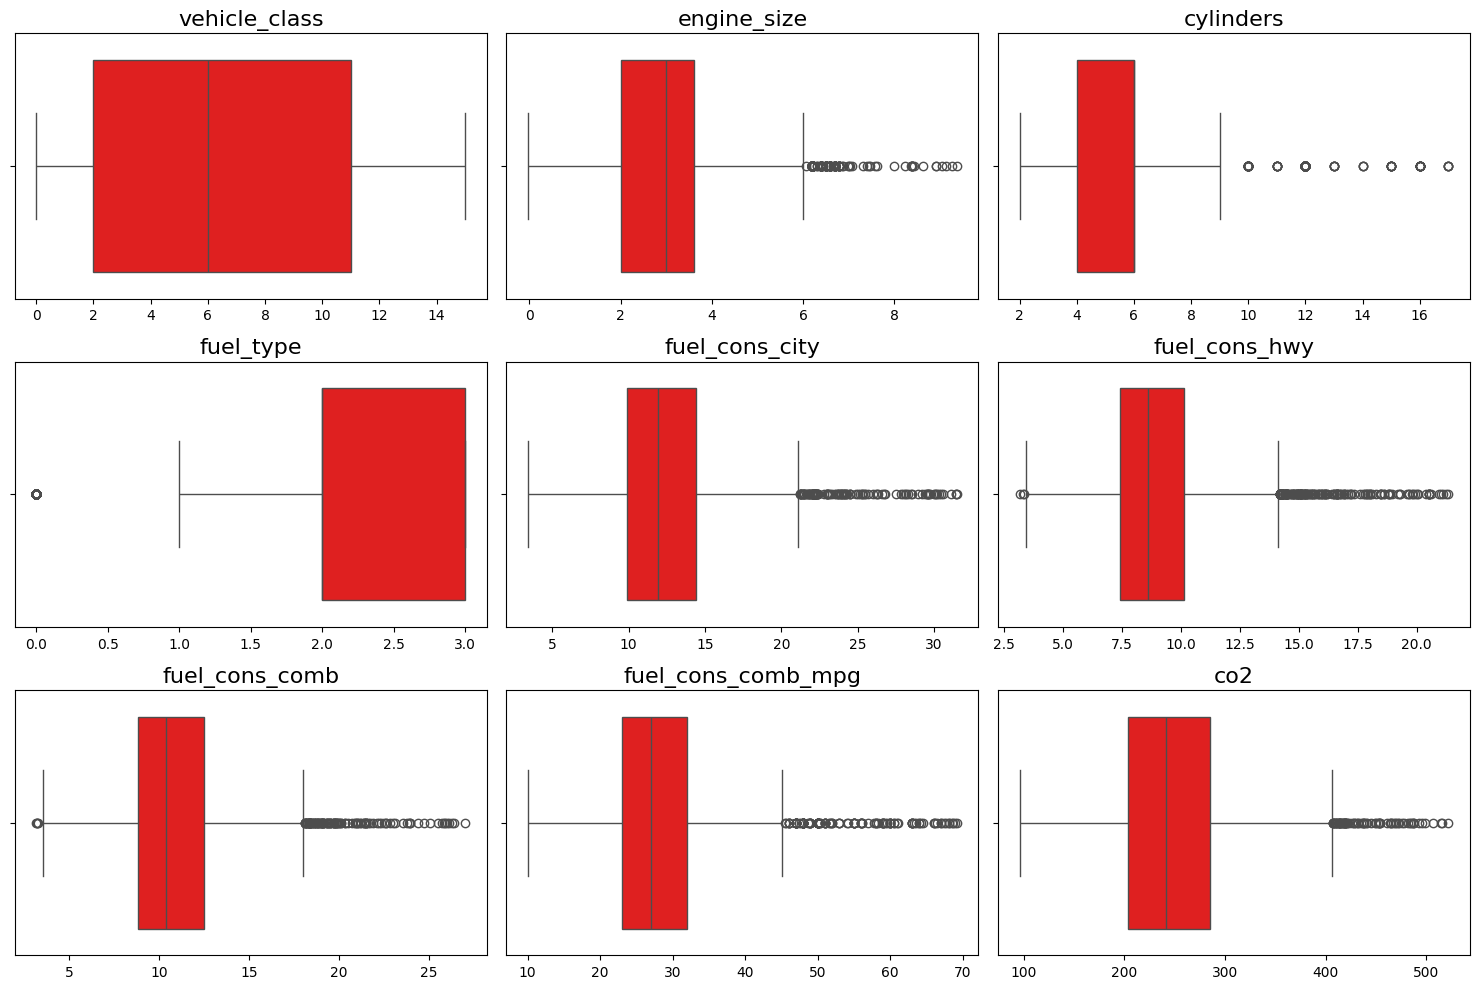

In [38]:
# visualisasi menggunakan boxplot untuk melihat data outliers
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(data=data, x=data[col], color='red', ax=ax[i])
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [40]:
# Menangani data outlier dengan mengubah nilai outlier ke nilai kuartil terdekat(Kuartil 1 dan Kuartil 3).

def iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[col] = data[col].mask(data[col] < lower_bound, Q1)
    data[col] = data[col].mask(data[col] > upper_bound, Q3)
    return data

for col in data.columns:
    iqr_outliers(data, col)

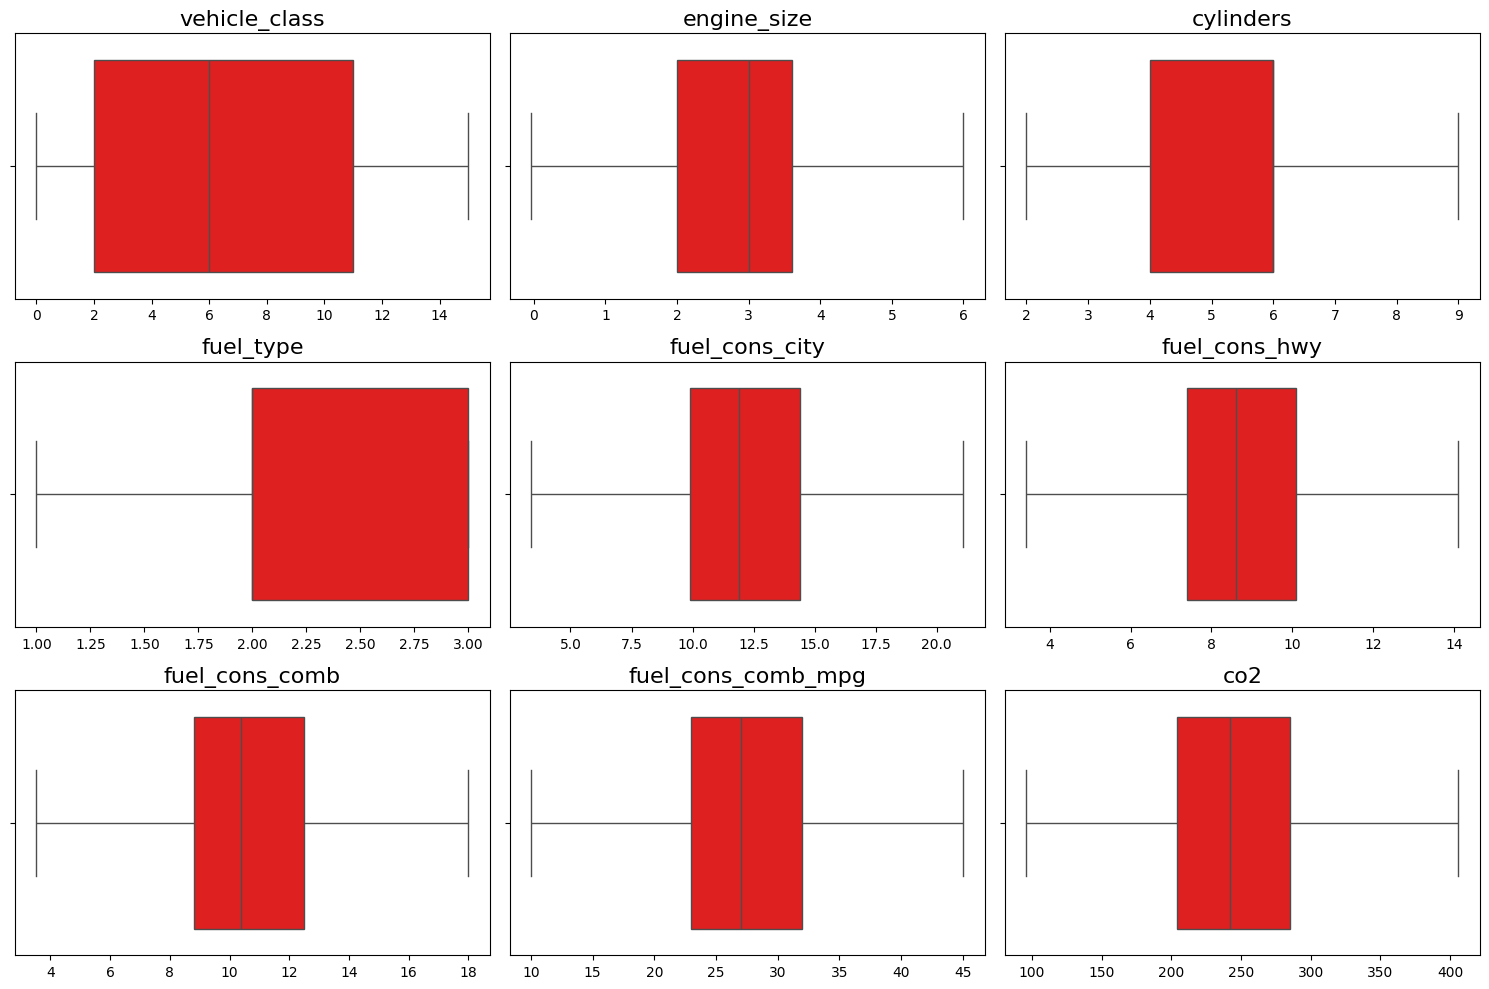

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
ax = ax.flatten()

for i, col in enumerate(data.columns):
    sns.boxplot(data=data, x=data[col], color='red', ax=ax[i])
    ax[i].set_title(col, fontsize=16)
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [42]:
# membagi data fitur dan data target
x = data.drop('co2', axis=1)
y = data['co2']

In [44]:
x.head()

,vehicle_class,engine_size,cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg
0,6,5.3,8,3,14.6,10.3,12.7,22.0
1,2,2.4,4,3,9.1,6.8,8.0,35.0
2,5,3.6,6,3,13.0,9.2,11.3,25.0
3,2,2.0,4,2,10.5,7.6,9.2,31.0
4,2,2.0,4,2,7.8,5.3,6.7,42.0


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)